In [112]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [113]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

### Stock Prices

In [114]:

msft = yf.Ticker("ASML")
msft = yf.Ticker("RS")
msft = yf.Ticker("TG")
msft = yf.Ticker("KALU")

# get all stock info
# msft.info

In [115]:
# get historical market data
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-07-07 00:00:00-04:00,28.904330,32.758241,26.861757,27.105839,115300,0.0,0.0
2006-07-10 00:00:00-04:00,28.262017,28.326248,26.354330,28.326248,36700,0.0,0.0
2006-07-11 00:00:00-04:00,28.332677,28.332677,28.197791,28.262022,56100,0.0,0.0
2006-07-12 00:00:00-04:00,28.422588,28.422588,28.294124,28.422588,24100,0.0,0.0
2006-07-13 00:00:00-04:00,28.583163,29.546640,27.889458,28.165655,41300,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-01 00:00:00-04:00,72.800003,73.540001,71.980003,73.040001,74700,0.0,0.0
2024-10-02 00:00:00-04:00,73.110001,73.110001,71.660004,72.169998,61100,0.0,0.0
2024-10-03 00:00:00-04:00,71.110001,71.949997,70.260002,70.489998,81900,0.0,0.0


<Axes: xlabel='Date'>

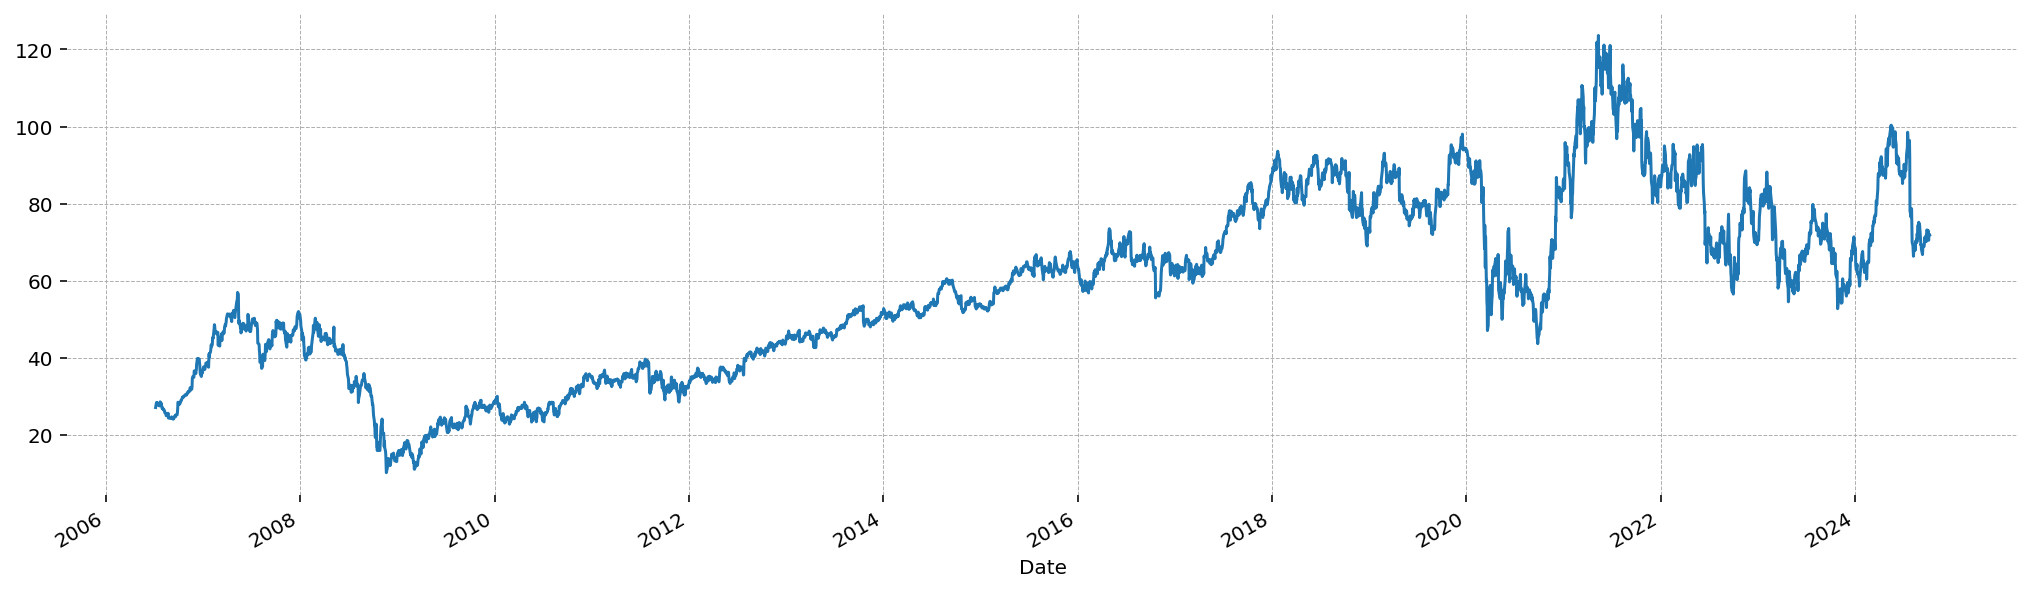

In [116]:
hist['Close'].plot()

In [117]:
companies = ['ASML','RS','TG','KALU']
combined1 = []
for i in companies:
    print(i)
    msft = yf.Ticker(i)
    history = msft.history(period="max")
    close = history['Close']
    combined1.append(close)

ASML
RS
TG
KALU


<Axes: xlabel='Date'>

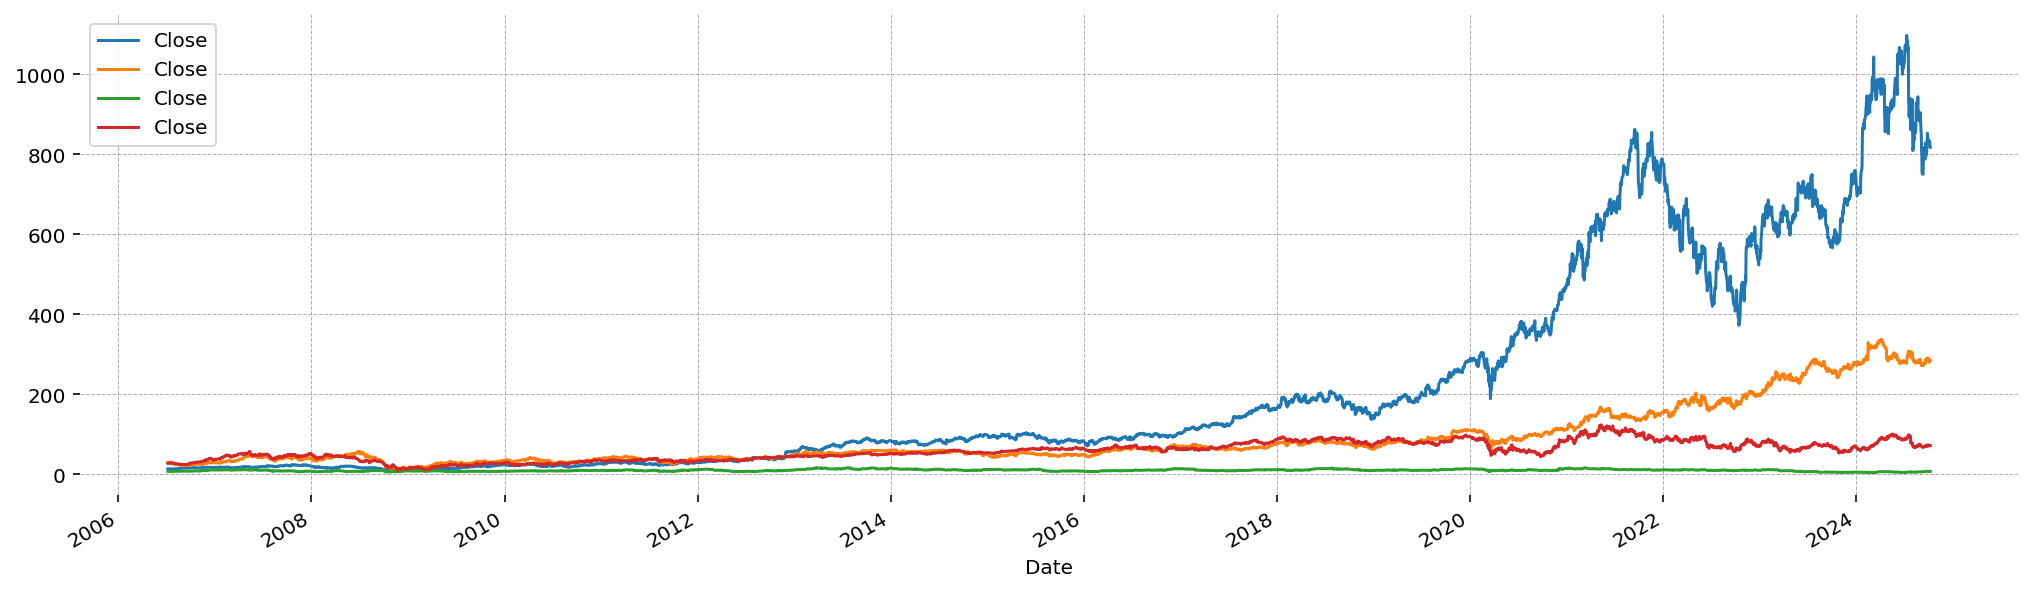

In [118]:
dt1 = pd.concat(combined1, axis=1)
dt1.dropna(inplace=True)
dt1.plot()


## Price of Aluminium and Crude Oil

<Axes: >

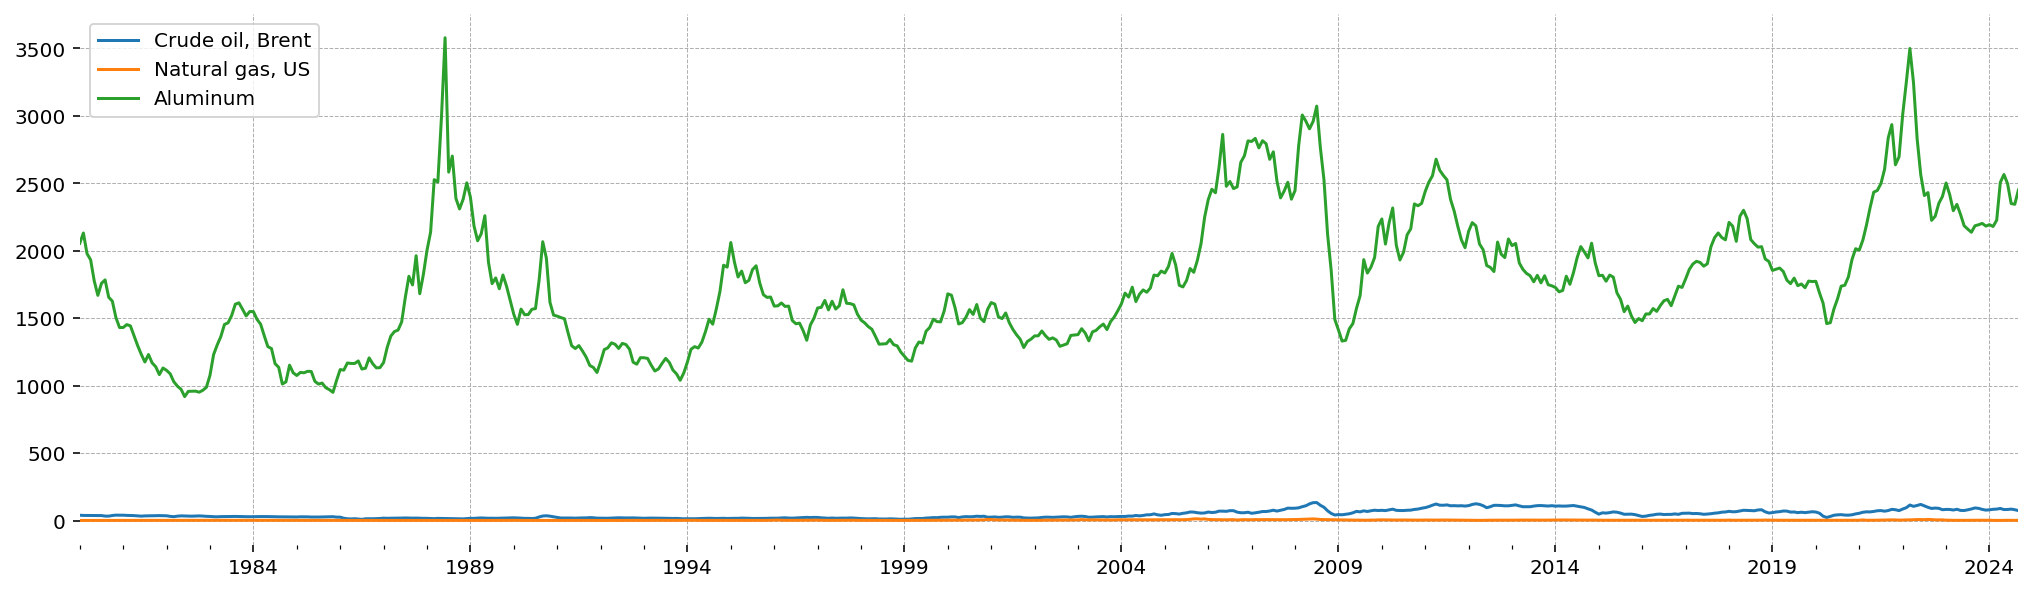

In [119]:
file_path = '../data/CMO-Historical-Data-Monthly.xlsx'

data = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4)
data.drop([0], inplace=True) #units
data.drop(columns=["Unnamed: 0"], inplace=True)

data.index = pd.date_range("1960-01-01", periods=data.shape[0], freq="MS")

data = data.loc['1980-01-01':,:]
data_original = data.copy()
data_original = data_original[['Crude oil, Brent', 'Natural gas, US', 'Aluminum']]

data_original.plot()

<Axes: >

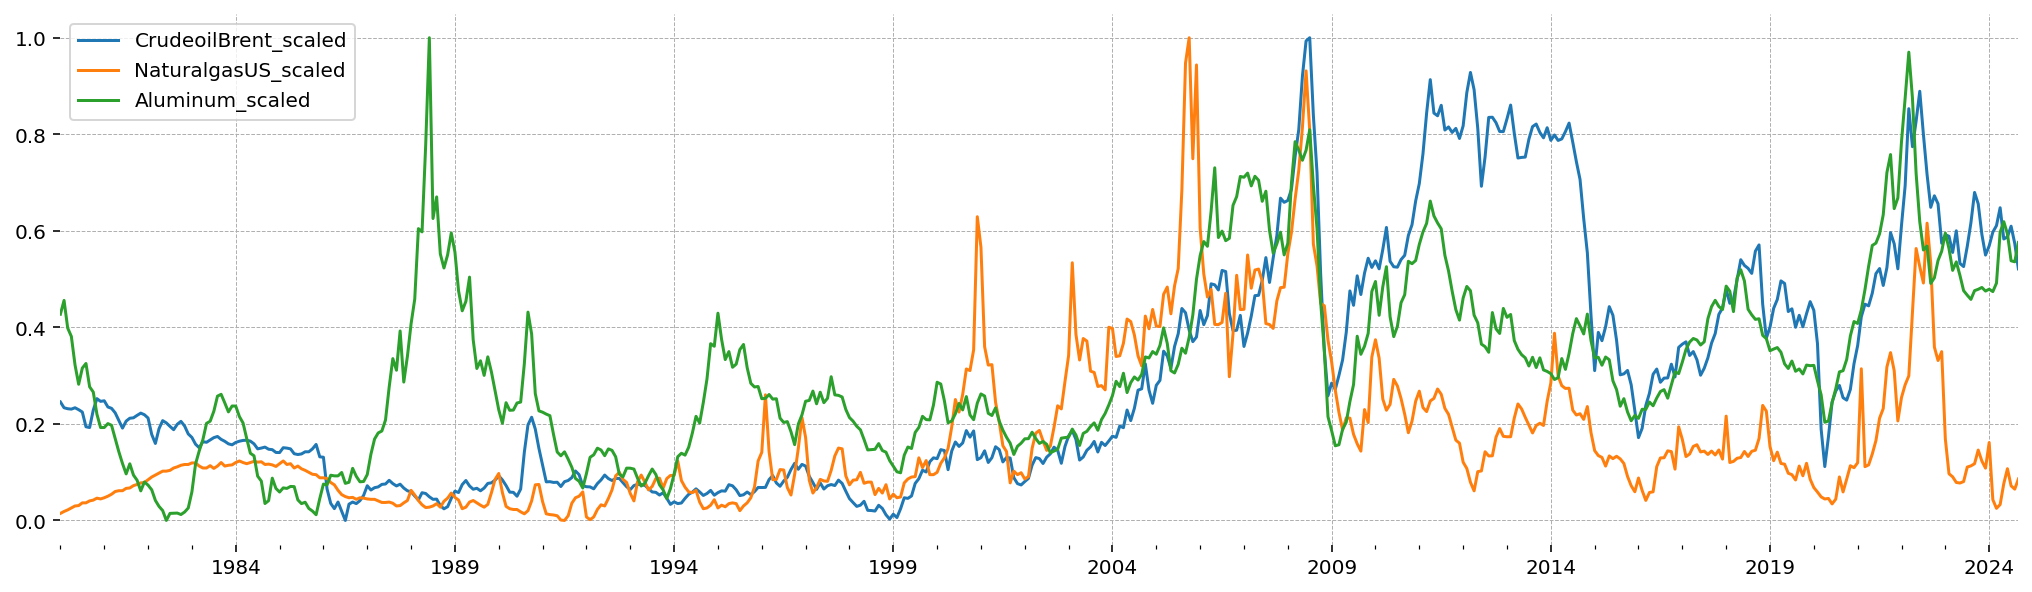

In [120]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(data_original)
data_scaled = scaler.transform(data_original)
data_scaled.dtype
type(data_scaled)
data_scaled.shape

data_original[['CrudeoilBrent_scaled', 'NaturalgasUS_scaled', 'Aluminum_scaled']] = scaler.transform(data_original)
data_original[['CrudeoilBrent_scaled', 'NaturalgasUS_scaled', 'Aluminum_scaled']].plot()




In [121]:
data_original

,"Crude oil, Brent","Natural gas, US",Aluminum,CrudeoilBrent_scaled,NaturalgasUS_scaled,Aluminum_scaled
1980-01-01,40,1.37,2054.860107,0.245533,0.014595,0.427241
1980-02-01,38.5,1.42,2131.008545,0.233478,0.018650,0.455879
1980-03-01,38.25,1.46,1978.378906,0.231468,0.021893,0.398479
1980-04-01,38.150002,1.51,1932.455566,0.230665,0.025947,0.381208
1980-05-01,38.5,1.56,1775.803711,0.233478,0.030002,0.322296
...,...,...,...,...,...,...
2024-05-01,81.995,2.1314,2564.54,0.583051,0.076334,0.618918
2024-06-01,82.555,2.5123,2497.61,0.587552,0.107220,0.593747
2024-07-01,85.296,2.0751,2349.13,0.609582,0.071769,0.537908
2024-08-01,80.863,1.9903,2343.67,0.573953,0.064893,0.535855


## Exports of Bauxite
Australia
China
Guinea
Brazil
India